# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

## INSTALATION OF LIBRARIES 

In [203]:
#importation of libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

## DATA READING 


In [153]:
#data upload 
data=pd.read_csv(r'C:\Users\migue\OneDrive\Desktop\curso de data science\Ventas.csv')
data

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


## PREVIOUS DATA ANALISIS

In [155]:
#data basic info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [157]:
#there are no missing values, but data column needs to be readjusted 
data.Fecha=pd.to_datetime(data.Fecha)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


## DATA CLEANING AND TRANSFORMATION 

In [165]:
#let's normalise data 
norm_col_names=data.drop(['Fecha','Ventas'],axis=1).columns
scale=MinMaxScaler(feature_range=(0,1))
normalized_data=scale.fit_transform(data[norm_col_names])
norm_data=pd.DataFrame(normalized_data, columns=norm_col_names)
norm_data['Fecha']  =data.Fecha
norm_data['Ventas']=data.Ventas
data=norm_data
data

,DíaDeLaSemana,Promociones,Festivo,Fecha,Ventas
0,0.833333,0.0,0.0,2022-01-01,4033
1,1.000000,0.0,1.0,2022-01-02,4012
2,0.000000,0.0,0.0,2022-01-03,1608
3,0.166667,1.0,0.0,2022-01-04,2046
4,0.333333,0.0,0.0,2022-01-05,2484
...,...,...,...,...,...
360,0.166667,1.0,0.0,2022-12-27,2189
361,0.333333,0.0,0.0,2022-12-28,2548
362,0.500000,0.0,0.0,2022-12-29,3018
363,0.666667,0.0,0.0,2022-12-30,3591


## SPLITTING DATA INTO TRAINING AND TEST SUBSETS

In [185]:
#We can proceed to prepare data for cross validation. 
#let's define explicative variables 
X=data.drop(['Fecha','Ventas'],axis=1)
X

,DíaDeLaSemana,Promociones,Festivo
0,0.833333,0.0,0.0
1,1.000000,0.0,1.0
2,0.000000,0.0,0.0
3,0.166667,1.0,0.0
4,0.333333,0.0,0.0
...,...,...,...
360,0.166667,1.0,0.0
361,0.333333,0.0,0.0
362,0.500000,0.0,0.0
363,0.666667,0.0,0.0


In [187]:
#and the response variable 
y=data.Ventas
y

0      4033
1      4012
2      1608
3      2046
4      2484
       ... 
360    2189
361    2548
362    3018
363    3591
364    4351
Name: Ventas, Length: 365, dtype: int64

In [189]:
#We split the sample and set a random state for repeatibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=73)


## EXPLORATOY ANALYSIS 

In [191]:
#let's do some exploratory analysis 
data.describe()

,DíaDeLaSemana,Promociones,Festivo,Fecha,Ventas
count,365.000000,365.000000,365.000000,365,365.000000
mean,0.500913,0.200000,0.142466,2022-07-01 23:59:59.999999744,2997.219178
min,0.000000,0.000000,0.000000,2022-01-01 00:00:00,1305.000000
25%,0.166667,0.000000,0.000000,2022-04-02 00:00:00,2195.000000
50%,0.500000,0.000000,0.000000,2022-07-02 00:00:00,3074.000000
75%,0.833333,0.000000,0.000000,2022-10-01 00:00:00,3979.000000
max,1.000000,1.000000,1.000000,2022-12-31 00:00:00,4404.000000
std,0.333790,0.400549,0.350007,NaN,942.096284


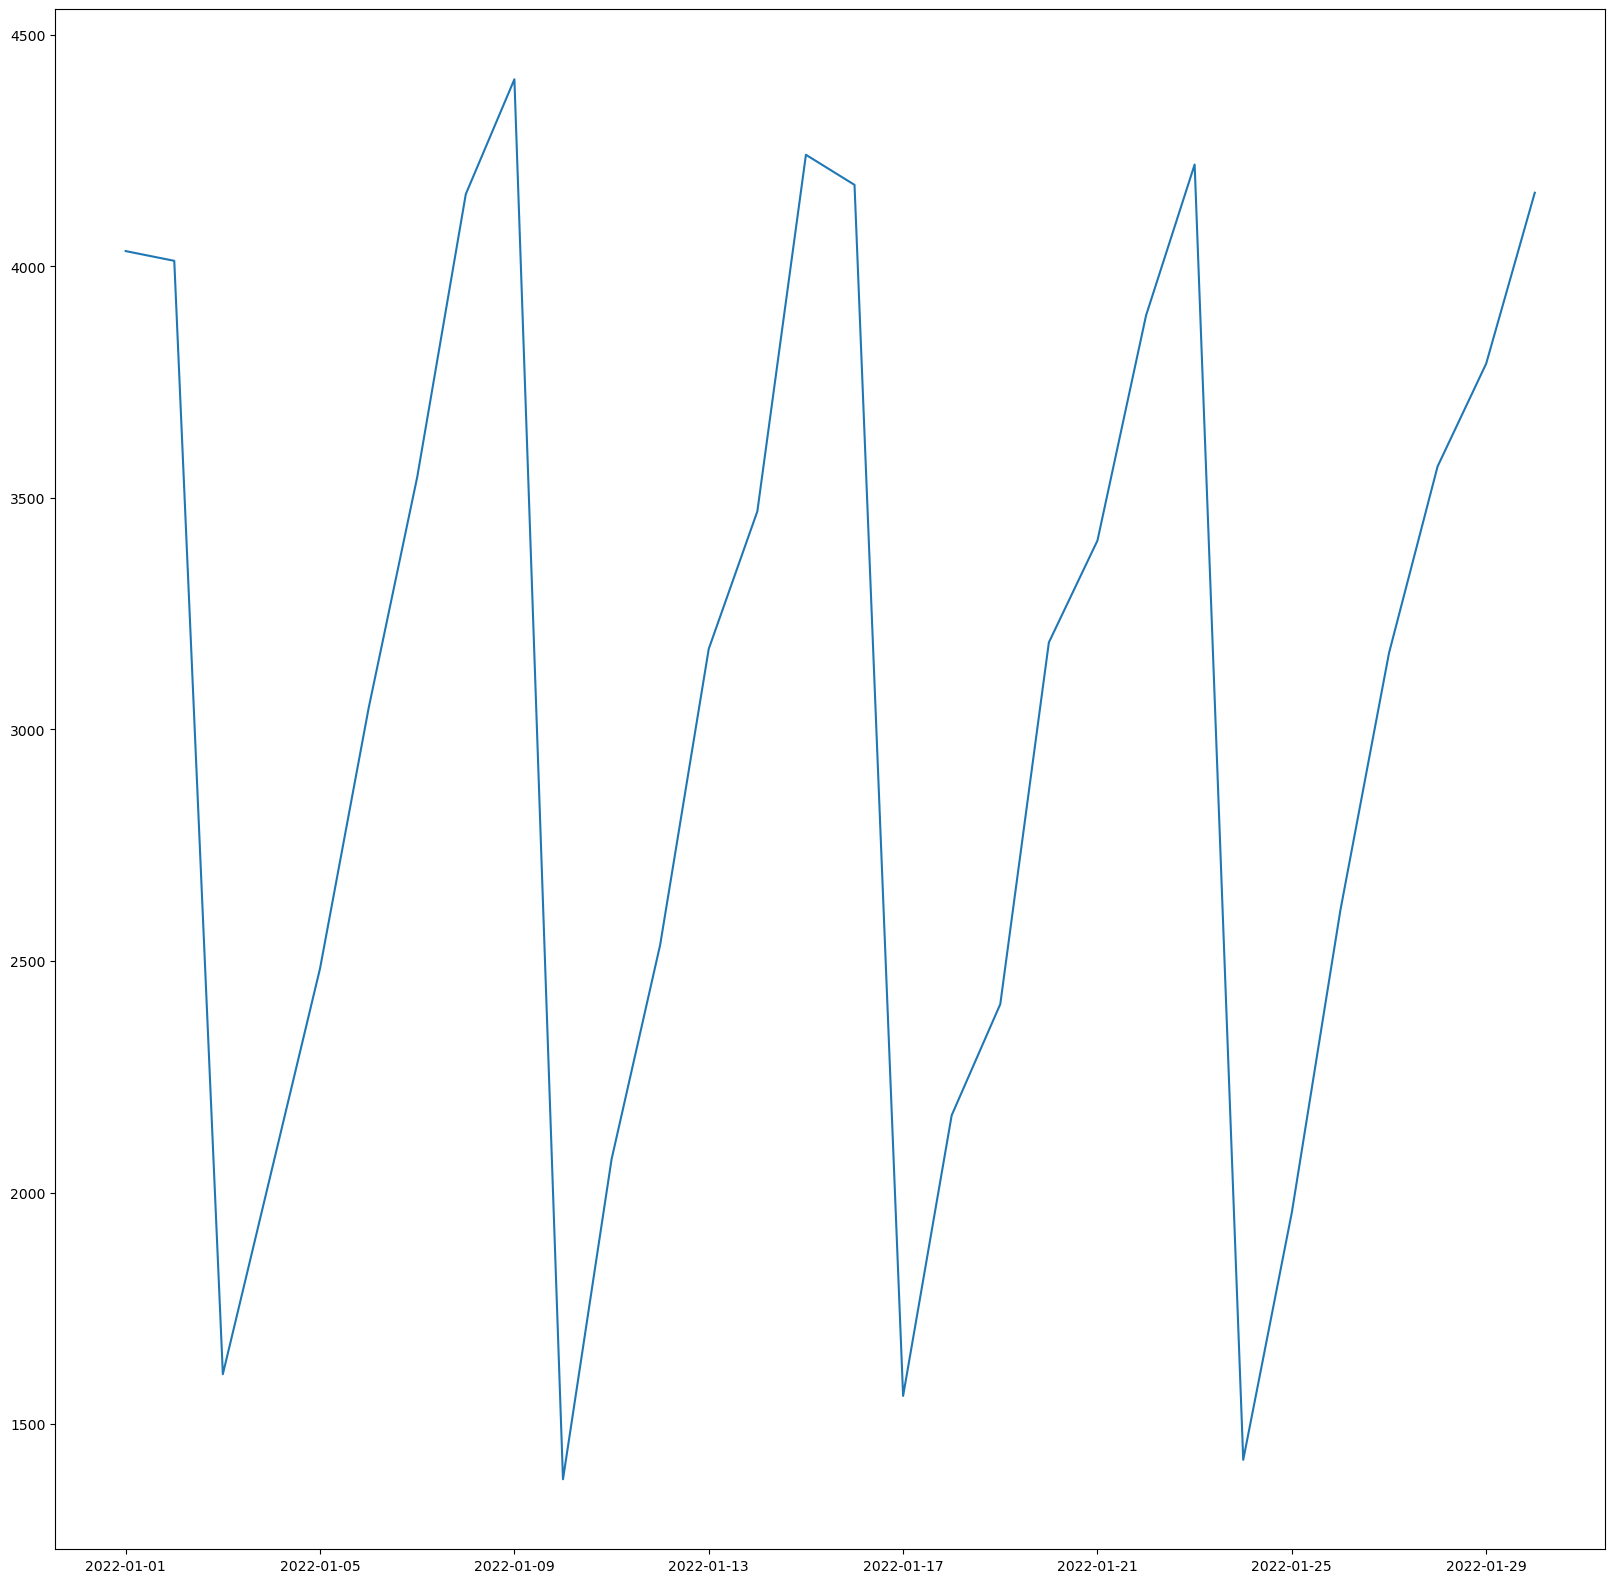

In [193]:
#let's plot the first 30 days data 
plt.figure(figsize=(20,20))
plt.plot(data.Fecha[0:30], data.Ventas[0:30])

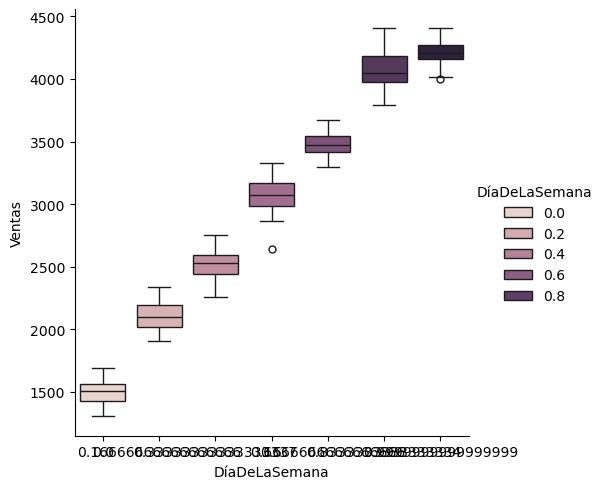

In [195]:
#we can observe as though there existed some tendency. Probably we could group by days of the week and obtain some insights
sns.catplot(data, x='DíaDeLaSemana', y='Ventas', hue='DíaDeLaSemana', kind='box')

it seems very depedant on the day of the week 

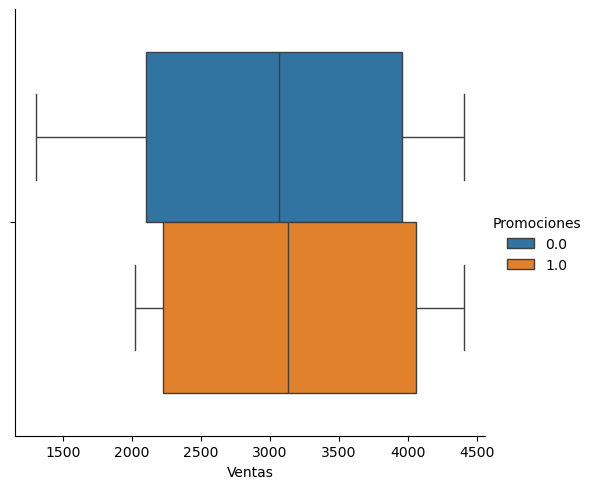

In [291]:
sns.catplot(data, x='Ventas', kind='box', hue='Promociones')

we see how the median of discount days is higher than regular ones, also wiskers have compacted poiting out a reduction of 
the variability.

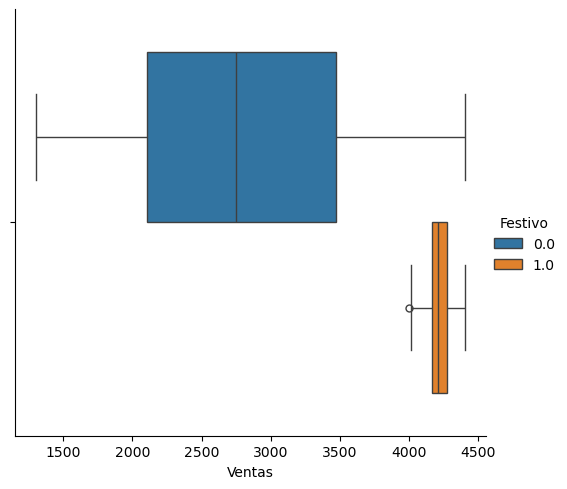

In [295]:
sns.catplot(data, x='Ventas', kind='box', hue='Festivo')

in this graphic is clear how on holidays sales skyrocket 

In [372]:
week_values_list=data.DíaDeLaSemana.unique()
week_values_list=week_values_list.tolist()
week_values_list.sort()
week_days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
            'Sunday']

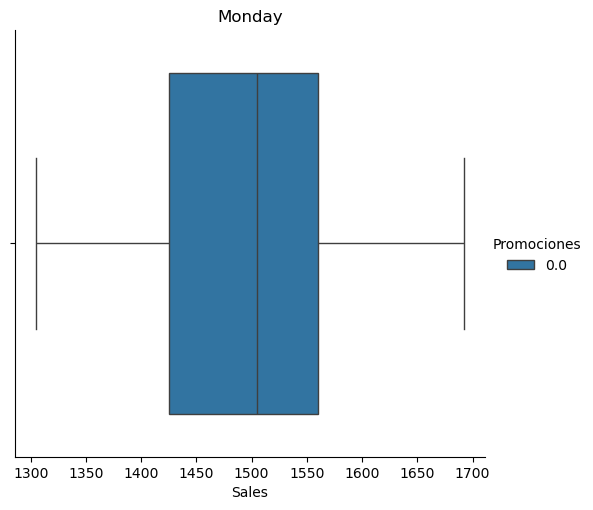

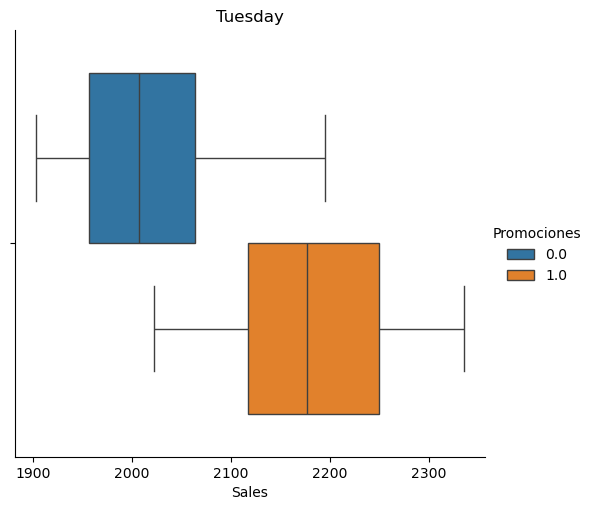

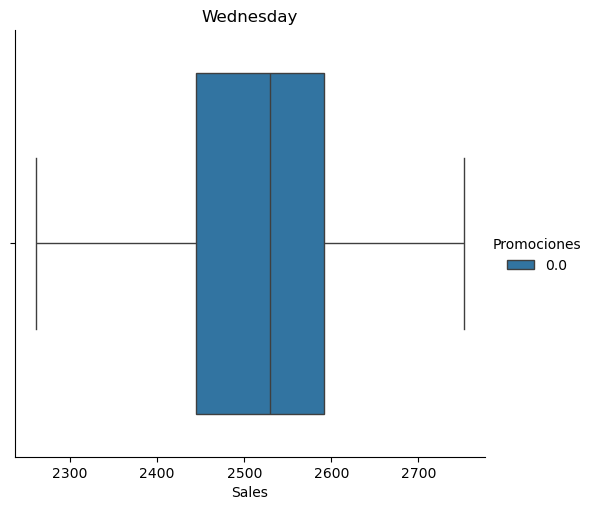

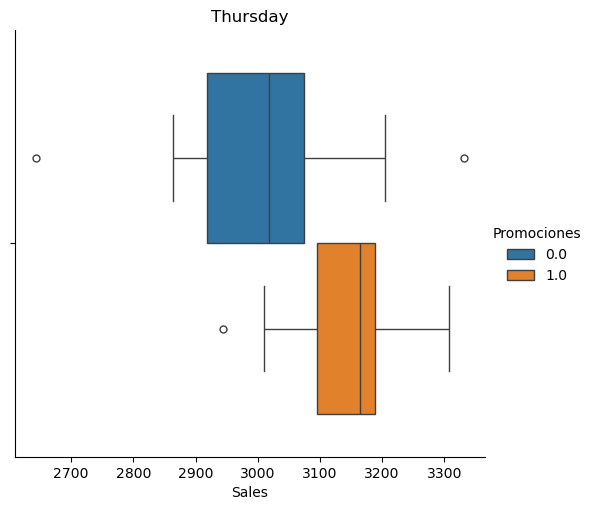

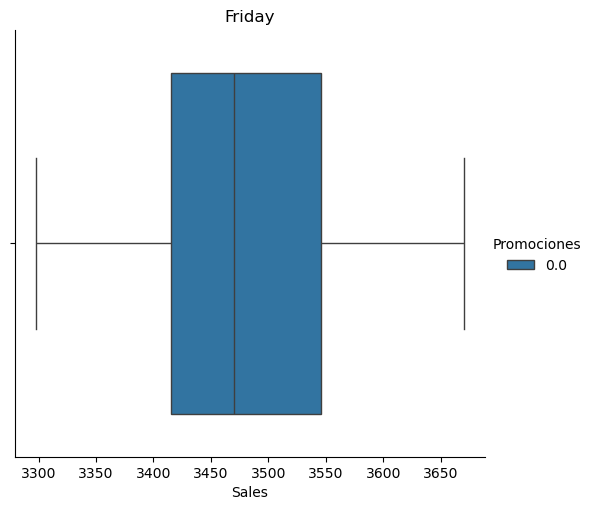

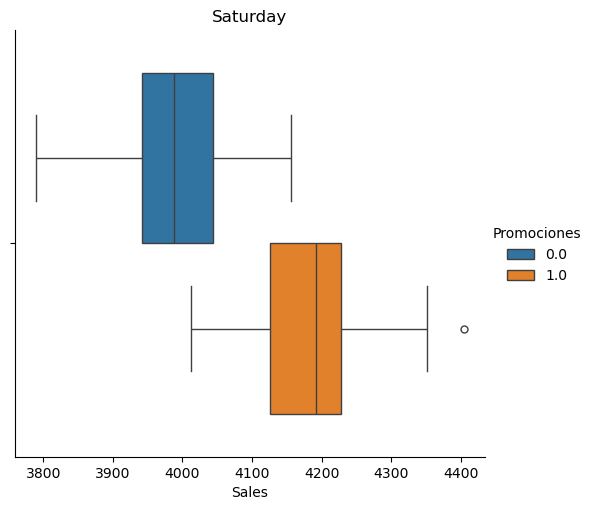

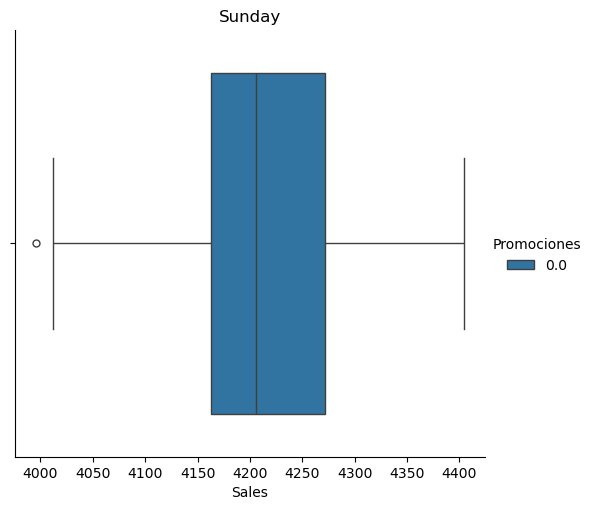

In [380]:
for item in range(0,7):
    sns.catplot(data[data.DíaDeLaSemana==week_values_list[item]], x='Ventas', kind='box', hue='Promociones')
    plt.title(f'{week_days[item]}')
    plt.xlabel('Sales')
 

## PREDICITVE MODELING 

In [ ]:
#we proceed by selecting a model for this data
models = [
    ('Linear regression', LinearRegression()),
    ('Logistic regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Decision forest', RandomForestRegressor())
]
models

In [207]:
for name, model in models: 
    model.fit(X_train, y_train)
    score= model.score(X_train, y_train)
    print(f'The model {name} has a score of: {score}')

The model Linear regression has a score of: 0.9895039507415593
The model Logistic regression has a score of: 0.023972602739726026
The model Decision Tree has a score of: 0.9897353554449883
The model Decision forest has a score of: 0.9897320384241705


In [231]:
#on this ocassion linear regression seems to be the best fit
model=LinearRegression()
model.fit(X_train,y_train)
model_predictions=model.predict(X_test)


Text(0.5, 0, 'real values')

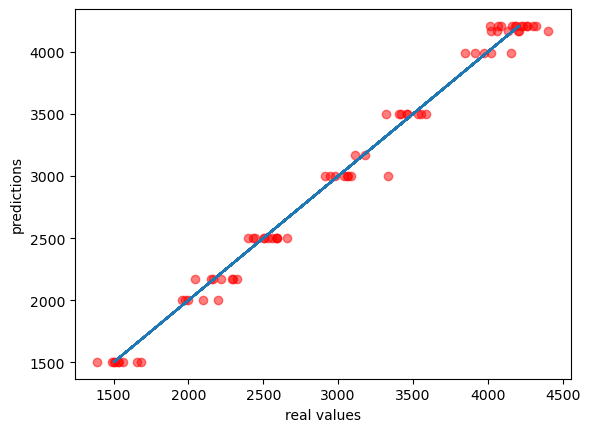

In [267]:
#let's plot the new values
plt.scatter(y_test, model_predictions, c='red', alpha=0.5 )
plt.plot(model_predictions,model_predictions)
plt.ylabel('predictions')
plt.xlabel('real values')

In [275]:
df_test=pd.DataFrame({'Real':y_test, 'Predictions' : model_predictions})
df_test=df_test.sort_index()
df_test

,Real,Predictions
1,4012,4209.075000
3,2046,2172.368024
7,4156,3993.941806
16,1561,1503.014702
17,2167,2172.368024
...,...,...
343,4404,4165.109707
344,4300,4209.075000
353,2298,2172.368024
354,2586,2499.385544


## GRAPHICAL VALIDATION 

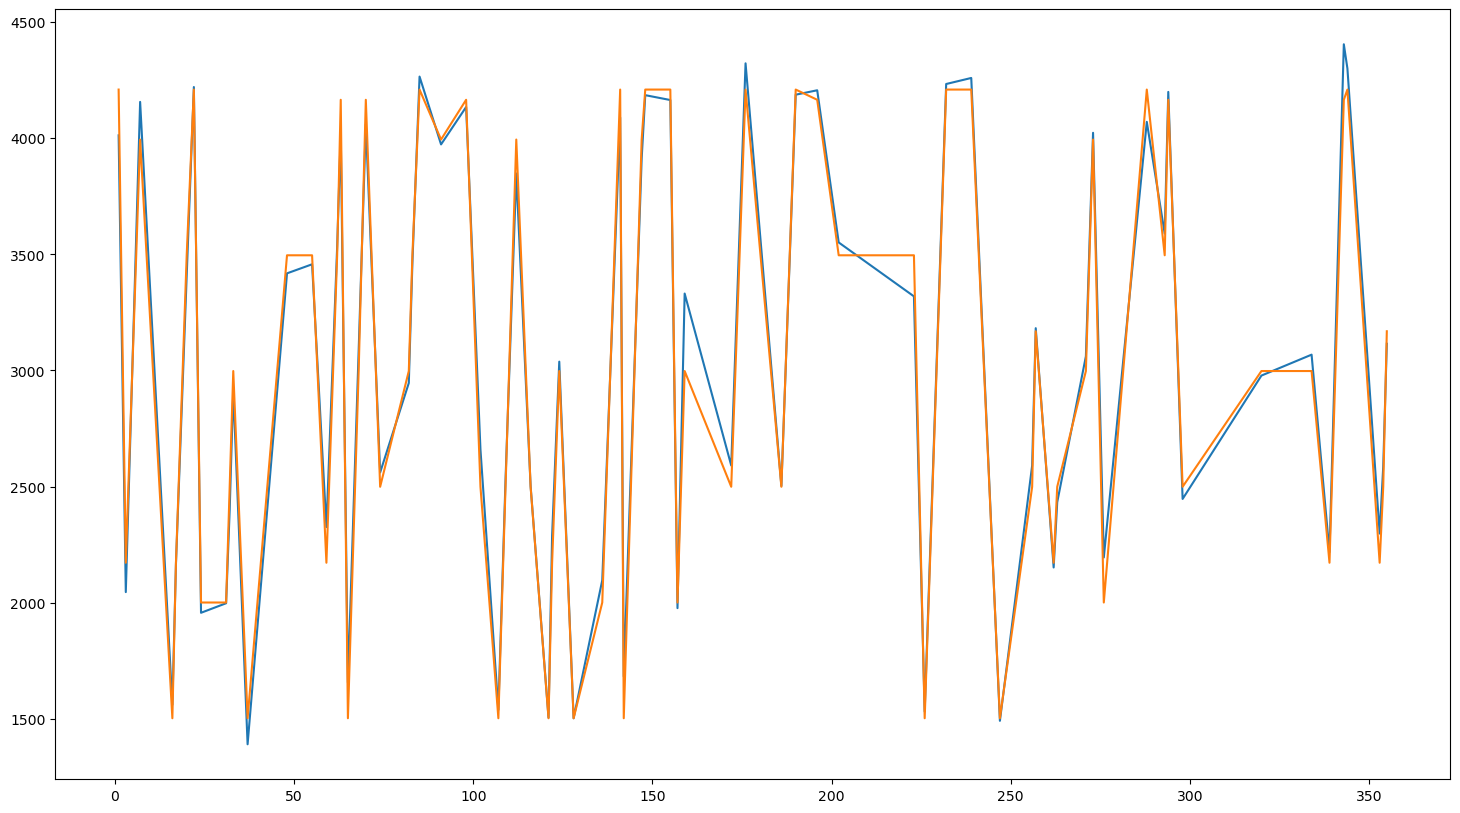

In [285]:
plt.figure(figsize=(18,10))
plt.plot(df_test.Real)
plt.plot(df_test.Predictions)

## INSIGHTS

Discounts days are in act havingan impinge on sales. 
Sales tend to raise as the week goes by. 
Holidays are the most profitable. 





